# Analysis of queue throughput measurements

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("measurements.csv")

In [52]:
# placeholder for filter

In [53]:
"""Plot profile from latest run."""


def plot_profile(profile):
    df1 = df.loc[df["profile"] == profile]
    # filter latest
    latest = df1["timestamp"].max()
    df1 = df1.loc[df["timestamp"] == latest]
    if not df1.empty:
        df2: pd.DataFrame = df1.pivot(
            index="items", columns="storage_engine", values="throughput"
        )
        plt = df2.plot(
            title=f"Throughput with profile {profile} ({latest})", style=".-"
        )
        plt.set_ylim(bottom=0)
        return plt

<Axes: title={'center': 'Throughput with profile minimum (2023-06-01T17:17:25.247971+00:00)'}, xlabel='items'>

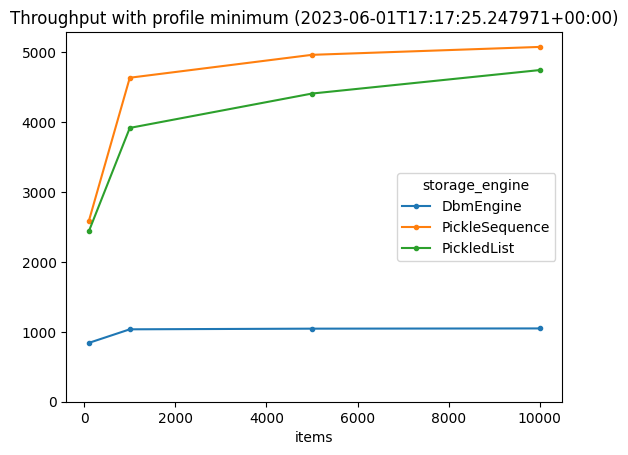

In [54]:
plot_profile("minimum")

In [55]:
plot_profile("medium")

In [56]:
plot_profile("heavy")

In [57]:
plot_profile("producers only")

In [58]:
plot_profile("consumers only")